# MultiEval Example

This notebook demonstrates a basic parameter sweep with LensKits `MultiEval` class.

## Setup

We first need to import our libraries.

In [1]:
from lenskit.batch import MultiEval
from lenskit.crossfold import partition_users, SampleN
from lenskit.algorithms import basic, als
from lenskit.datasets import MovieLens
from lenskit import topn, util
import pandas as pd
import matplotlib.pyplot as plt

Progress bars are useful:

In [2]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

C:\Users\michaelekstrand\Anaconda3\envs\lkpy-dev\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


It takes a little while to run things, and can get kinda quiet in here. Let's set up logging so we can see the logging output in the notebook's message stream:

In [3]:
util.log_to_notebook()

[   INFO] lenskit.util.log notebook logging configured


Then set up the data access.

In [4]:
mlsmall = MovieLens('../data/ml-latest-small')

## Experiment

We're going to run our evaluation and store its output in the `my-eval` directory, generating 20-item recommendation lists::

In [5]:
eval = MultiEval('my-eval', recommend=20)

We're going to use a 5-fold cross-validation setup.  We save the data into a list in memory so we have access to the test data later.  In a larger experiment, you might write the partitions to disk and pass the file names to `add_datasets`.

In [6]:
pairs = list(partition_users(mlsmall.ratings, 5, SampleN(5)))
eval.add_datasets(pairs, name='ML-Small')

[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: partitioning training data
[   INFO] lenskit.crossfold fold 2: selecting test ratings
[   INFO] lenskit.crossfold fold 2: partitioning training data
[   INFO] lenskit.crossfold fold 3: selecting test ratings
[   INFO] lenskit.crossfold fold 3: partitioning training data
[   INFO] lenskit.crossfold fold 4: selecting test ratings
[   INFO] lenskit.crossfold fold 4: partitioning training data


We're going to test explicit MF with several neighborhood sizes:

In [7]:
eval.add_algorithms([als.BiasedMF(f) for f in [20, 30, 40, 50]],
                    attrs=['features'], name='BiasedMF')

And implicit MF:

In [8]:
eval.add_algorithms([als.ImplicitMF(f) for f in [20, 30, 40, 50]],
                    attrs=['features'], name='ImplicitMF')

And add a popular baseline for comparison:

In [9]:
eval.add_algorithms(basic.Popular(), name='Pop')

And finally, we will run the experiment!

In [10]:
eval.run(progress=tqdm)

[   INFO] lenskit.batch._multi starting run 1: als.BiasedMF(features=20, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=20, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=20, regularization=0.1) on 99329 ratings
[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.basic building bias model for 99329 ratings
[   INFO] lenskit.algorithms.basic global mean: 3.543
[   INFO] lenskit.algorithms.basic computed means for 9060 items
[   INFO] lenskit.algorithms.basic computed means for 671 users
[   INFO] lenskit.algorithms.als [ 351ms] normalizing 671x9060 matrix (99329 nnz)
[   INFO] lenskit.algorithms.als [1.75s] training biased MF model with ALS for 20 features
[   INFO] lenskit.algorithms.als [5.15s] finished epoch 0 (|ΔP|=32.144, |ΔQ|=124.881)
[   INFO] lenskit.algorithms.als [5.17s] finished epoch 1 (|ΔP|=12.154, |ΔQ|=51.625)
[   INFO] lenski

[   INFO] lenskit.batch._recommend recommended for 135 users in 1.94s
[   INFO] lenskit.batch._multi generated recommendations in 2.14s
[   INFO] lenskit.batch._multi run 2: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 2: als.BiasedMF(features=30, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 3: als.BiasedMF(features=40, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=40, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=40, regularization=0.1) on 99329 ratings
[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.basic building bias model for 99329 ratings
[   INFO] lenskit.algorithms.basic global mean: 3.543
[   INFO] lenskit.algorithms.basic computed means for 9060 items
[   INFO] lenskit.algorithms.basic computed means for 671 users
[   INFO] lenskit.algorithms

[   INFO] binpickle.write pickled 1339 bytes with 10 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=50, regularization=0.1) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 135 users in 1.87s
[   INFO] lenskit.batch._multi generated recommendations in 2.06s
[   INFO] lenskit.batch._multi run 4: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 4: als.BiasedMF(features=50, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 5: als.ImplicitMF(features=20, reg=0.1, w=40) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=20, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=20, reg=0.1, w=40) on 99329 ratings
[   INFO] lenskit.algorithms.als [ 12ms] training implicit MF model with ALS for 20

[   INFO] lenskit.batch._recommend recommended for 135 users in 1.89s
[   INFO] lenskit.batch._multi generated recommendations in 2.09s
[   INFO] lenskit.batch._multi run 6: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 6: als.ImplicitMF(features=30, reg=0.1, w=40) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 7: als.ImplicitMF(features=40, reg=0.1, w=40) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=40, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=40, reg=0.1, w=40) on 99329 ratings
[   INFO] lenskit.algorithms.als [ 15ms] training implicit MF model with ALS for 40 features
[   INFO] lenskit.algorithms.als have 99329 observations for 671 users and 9060 items
[   INFO] lenskit.algorithms.als [ 67ms] finished epoch 0 (|ΔP|=4093.762, |ΔQ|=7.804)
[   INFO] lenskit.algorithms.als [ 117ms] finished epoch 1 (|ΔP|=208.600, |ΔQ|=2.987)
[   

[   INFO] lenskit.batch._multi finished run 8: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 9: Popular on ML-Small:1
[   INFO] lenskit.batch._multi training algorithm Popular on 99329 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99329 ratings
[   INFO] lenskit.batch._multi trained algorithm Popular in  13ms
[   INFO] lenskit.batch._multi generating recommendations for 135 users for Popular
[   INFO] lenskit.sharing persisting Popular to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-u5seysx_.bpk
[   INFO] binpickle.write pickled 967 bytes with 7 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._recommend recommending with Popular for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 135 users in  687ms
[   INFO] lenskit.batch._multi generated recommendations in  757ms
[   INFO] lenskit.batch._multi run 9: writing res

[   INFO] lenskit.sharing persisting TopN/als.BiasedMF(features=30, regularization=0.1) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-57mcycqu.bpk
[   INFO] binpickle.write pickled 1340 bytes with 10 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._predict generating 670 predictions for 134 users
[   INFO] lenskit.batch._multi generated predictions in 1.92s
[   INFO] lenskit.batch._multi run 11: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 134 users for TopN/als.BiasedMF(features=30, regularization=0.1)
[   INFO] lenskit.sharing persisting TopN/als.BiasedMF(features=30, regularization=0.1) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-zj2qmvbp.bpk
[   INFO] binpickle.write pickled 1340 bytes with 10 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=30, r

[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=50, regularization=0.1) in  643ms
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.BiasedMF(features=50, regularization=0.1)
[   INFO] lenskit.sharing persisting TopN/als.BiasedMF(features=50, regularization=0.1) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-y7cnds73.bpk
[   INFO] binpickle.write pickled 1339 bytes with 10 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._predict generating 670 predictions for 134 users
[   INFO] lenskit.batch._multi generated predictions in 1.90s
[   INFO] lenskit.batch._multi run 13: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 134 users for TopN/als.BiasedMF(features=50, regularization=0.1)
[   INFO] lenskit.sharing persisting TopN/als.BiasedMF(feature

[   INFO] lenskit.sharing persisting TopN/als.ImplicitMF(features=30, reg=0.1, w=40) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-wujsxbg4.bpk
[   INFO] binpickle.write pickled 1193 bytes with 8 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._predict generating 670 predictions for 134 users
[   INFO] lenskit.batch._multi generated predictions in 1.91s
[   INFO] lenskit.batch._multi run 15: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 134 users for TopN/als.ImplicitMF(features=30, reg=0.1, w=40)
[   INFO] lenskit.sharing persisting TopN/als.ImplicitMF(features=30, reg=0.1, w=40) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-g5rk95rj.bpk
[   INFO] binpickle.write pickled 1193 bytes with 8 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=30, reg=0.1, w

[   INFO] lenskit.batch._predict generating 670 predictions for 134 users
[   INFO] lenskit.batch._multi generated predictions in 1.89s
[   INFO] lenskit.batch._multi run 17: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 134 users for TopN/als.ImplicitMF(features=50, reg=0.1, w=40)
[   INFO] lenskit.sharing persisting TopN/als.ImplicitMF(features=50, reg=0.1, w=40) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-g5icm38l.bpk
[   INFO] binpickle.write pickled 1193 bytes with 8 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=50, reg=0.1, w=40) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 1.93s
[   INFO] lenskit.batch._multi generated recommendations in 2.14s
[   INFO] lenskit.batch._multi run 17: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.ba

[   INFO] lenskit.algorithms.als [ 287ms] finished epoch 12 (|ΔP|=1.176, |ΔQ|=3.241)
[   INFO] lenskit.algorithms.als [ 305ms] finished epoch 13 (|ΔP|=1.063, |ΔQ|=2.917)
[   INFO] lenskit.algorithms.als [ 323ms] finished epoch 14 (|ΔP|=0.966, |ΔQ|=2.645)
[   INFO] lenskit.algorithms.als [ 342ms] finished epoch 15 (|ΔP|=0.883, |ΔQ|=2.411)
[   INFO] lenskit.algorithms.als [ 360ms] finished epoch 16 (|ΔP|=0.811, |ΔQ|=2.208)
[   INFO] lenskit.algorithms.als [ 379ms] finished epoch 17 (|ΔP|=0.748, |ΔQ|=2.031)
[   INFO] lenskit.algorithms.als [ 395ms] finished epoch 18 (|ΔP|=0.693, |ΔQ|=1.876)
[   INFO] lenskit.algorithms.als [ 413ms] finished epoch 19 (|ΔP|=0.644, |ΔQ|=1.739)
[   INFO] lenskit.algorithms.als trained model in  414ms (|P|=30.828555, |Q|=94.594339)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=30, regularization=0.1) in  429ms
[   INFO] lenskit.batch._multi generati

[   INFO] lenskit.algorithms.als [ 305ms] finished epoch 8 (|ΔP|=1.757, |ΔQ|=5.107)
[   INFO] lenskit.algorithms.als [ 332ms] finished epoch 9 (|ΔP|=1.480, |ΔQ|=4.337)
[   INFO] lenskit.algorithms.als [ 356ms] finished epoch 10 (|ΔP|=1.268, |ΔQ|=3.731)
[   INFO] lenskit.algorithms.als [ 385ms] finished epoch 11 (|ΔP|=1.103, |ΔQ|=3.246)
[   INFO] lenskit.algorithms.als [ 413ms] finished epoch 12 (|ΔP|=0.972, |ΔQ|=2.851)
[   INFO] lenskit.algorithms.als [ 442ms] finished epoch 13 (|ΔP|=0.865, |ΔQ|=2.524)
[   INFO] lenskit.algorithms.als [ 470ms] finished epoch 14 (|ΔP|=0.777, |ΔQ|=2.251)
[   INFO] lenskit.algorithms.als [ 494ms] finished epoch 15 (|ΔP|=0.703, |ΔQ|=2.022)
[   INFO] lenskit.algorithms.als [ 523ms] finished epoch 16 (|ΔP|=0.641, |ΔQ|=1.826)
[   INFO] lenskit.algorithms.als [ 552ms] finished epoch 17 (|ΔP|=0.588, |ΔQ|=1.656)
[   INFO] lenskit.algorithms.als [ 580ms] finished epoch 18 (|ΔP|=0.541, |ΔQ|=1.508)
[   INFO] lenskit.algorithms.als [ 608ms] finished epoch 19 (|ΔP|=0

[   INFO] lenskit.algorithms.als [ 632ms] finished epoch 11 (|ΔP|=69.467, |ΔQ|=0.568)
[   INFO] lenskit.algorithms.als [ 683ms] finished epoch 12 (|ΔP|=79.841, |ΔQ|=0.570)
[   INFO] lenskit.algorithms.als [ 735ms] finished epoch 13 (|ΔP|=64.893, |ΔQ|=0.504)
[   INFO] lenskit.algorithms.als [ 786ms] finished epoch 14 (|ΔP|=105.060, |ΔQ|=0.550)
[   INFO] lenskit.algorithms.als [ 837ms] finished epoch 15 (|ΔP|=57.707, |ΔQ|=0.453)
[   INFO] lenskit.algorithms.als [ 888ms] finished epoch 16 (|ΔP|=78.045, |ΔQ|=0.488)
[   INFO] lenskit.algorithms.als [ 940ms] finished epoch 17 (|ΔP|=50.216, |ΔQ|=0.406)
[   INFO] lenskit.algorithms.als [ 992ms] finished epoch 18 (|ΔP|=82.333, |ΔQ|=0.452)
[   INFO] lenskit.algorithms.als [1.05s] finished epoch 19 (|ΔP|=48.702, |ΔQ|=0.375)
[   INFO] lenskit.algorithms.als [1.05s] finished training model with 30 features (|P|=2806.043472, |Q|=9.975942)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch.

[   INFO] lenskit.algorithms.als [ 867ms] finished epoch 14 (|ΔP|=97.138, |ΔQ|=0.395)
[   INFO] lenskit.algorithms.als [ 939ms] finished epoch 15 (|ΔP|=104.980, |ΔQ|=0.384)
[   INFO] lenskit.algorithms.als [ 999ms] finished epoch 16 (|ΔP|=87.470, |ΔQ|=0.352)
[   INFO] lenskit.algorithms.als [1.05s] finished epoch 17 (|ΔP|=102.041, |ΔQ|=0.357)
[   INFO] lenskit.algorithms.als [1.11s] finished epoch 18 (|ΔP|=88.463, |ΔQ|=0.337)
[   INFO] lenskit.algorithms.als [1.16s] finished epoch 19 (|ΔP|=89.352, |ΔQ|=0.331)
[   INFO] lenskit.algorithms.als [1.17s] finished training model with 50 features (|P|=2621.603224, |Q|=8.521143)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=50, reg=0.1, w=40) in 1.18s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.ImplicitMF(features=50, reg=0.1, w=40)
[   INFO] lenskit.sharing persisting TopN/als.ImplicitMF(features=50, re

[   INFO] lenskit.algorithms.als [ 36ms] normalizing 671x9059 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 45ms] training biased MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als [ 62ms] finished epoch 0 (|ΔP|=33.149, |ΔQ|=126.683)
[   INFO] lenskit.algorithms.als [ 80ms] finished epoch 1 (|ΔP|=12.531, |ΔQ|=54.027)
[   INFO] lenskit.algorithms.als [ 98ms] finished epoch 2 (|ΔP|=9.214, |ΔQ|=27.636)
[   INFO] lenskit.algorithms.als [ 117ms] finished epoch 3 (|ΔP|=6.197, |ΔQ|=17.192)
[   INFO] lenskit.algorithms.als [ 135ms] finished epoch 4 (|ΔP|=4.445, |ΔQ|=12.560)
[   INFO] lenskit.algorithms.als [ 153ms] finished epoch 5 (|ΔP|=3.410, |ΔQ|=9.730)
[   INFO] lenskit.algorithms.als [ 172ms] finished epoch 6 (|ΔP|=2.751, |ΔQ|=7.807)
[   INFO] lenskit.algorithms.als [ 191ms] finished epoch 7 (|ΔP|=2.293, |ΔQ|=6.434)
[   INFO] lenskit.algorithms.als [ 208ms] finished epoch 8 (|ΔP|=1.952, |ΔQ|=5.428)
[   INFO] lenskit.algorithms.als [ 227ms] finished epoch 9 (|ΔP|=1.

[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.basic building bias model for 99334 ratings
[   INFO] lenskit.algorithms.basic global mean: 3.543
[   INFO] lenskit.algorithms.basic computed means for 9059 items
[   INFO] lenskit.algorithms.basic computed means for 671 users
[   INFO] lenskit.algorithms.als [ 40ms] normalizing 671x9059 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 54ms] training biased MF model with ALS for 50 features
[   INFO] lenskit.algorithms.als [ 81ms] finished epoch 0 (|ΔP|=34.181, |ΔQ|=128.832)
[   INFO] lenskit.algorithms.als [ 111ms] finished epoch 1 (|ΔP|=13.037, |ΔQ|=54.526)
[   INFO] lenskit.algorithms.als [ 135ms] finished epoch 2 (|ΔP|=9.395, |ΔQ|=27.100)
[   INFO] lenskit.algorithms.als [ 165ms] finished epoch 3 (|ΔP|=6.127, |ΔQ|=17.173)
[   INFO] lenskit.algorithms.als [ 194ms] finished epoch 4 (|ΔP|=4.313, |ΔQ|=12.515)
[   INFO] lenskit.algorithms.als [ 219ms] finished epoch 5 (|ΔP|=3.226, |ΔQ|=9.601)
[ 

[   INFO] lenskit.algorithms.als [ 14ms] training implicit MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9059 items
[   INFO] lenskit.algorithms.als [ 62ms] finished epoch 0 (|ΔP|=3805.819, |ΔQ|=8.315)
[   INFO] lenskit.algorithms.als [ 113ms] finished epoch 1 (|ΔP|=200.755, |ΔQ|=3.272)
[   INFO] lenskit.algorithms.als [ 164ms] finished epoch 2 (|ΔP|=107.821, |ΔQ|=2.245)
[   INFO] lenskit.algorithms.als [ 216ms] finished epoch 3 (|ΔP|=114.832, |ΔQ|=1.754)
[   INFO] lenskit.algorithms.als [ 269ms] finished epoch 4 (|ΔP|=128.287, |ΔQ|=1.433)
[   INFO] lenskit.algorithms.als [ 322ms] finished epoch 5 (|ΔP|=128.031, |ΔQ|=1.156)
[   INFO] lenskit.algorithms.als [ 377ms] finished epoch 6 (|ΔP|=106.760, |ΔQ|=0.965)
[   INFO] lenskit.algorithms.als [ 428ms] finished epoch 7 (|ΔP|=98.827, |ΔQ|=0.829)
[   INFO] lenskit.algorithms.als [ 482ms] finished epoch 8 (|ΔP|=98.387, |ΔQ|=0.756)
[   INFO] lenskit.algorithms.als [ 535ms] finishe

[   INFO] lenskit.algorithms.als [ 127ms] finished epoch 1 (|ΔP|=266.656, |ΔQ|=2.623)
[   INFO] lenskit.algorithms.als [ 182ms] finished epoch 2 (|ΔP|=274.084, |ΔQ|=1.779)
[   INFO] lenskit.algorithms.als [ 237ms] finished epoch 3 (|ΔP|=286.518, |ΔQ|=1.320)
[   INFO] lenskit.algorithms.als [ 291ms] finished epoch 4 (|ΔP|=242.929, |ΔQ|=1.032)
[   INFO] lenskit.algorithms.als [ 347ms] finished epoch 5 (|ΔP|=205.454, |ΔQ|=0.849)
[   INFO] lenskit.algorithms.als [ 401ms] finished epoch 6 (|ΔP|=182.811, |ΔQ|=0.727)
[   INFO] lenskit.algorithms.als [ 455ms] finished epoch 7 (|ΔP|=163.238, |ΔQ|=0.633)
[   INFO] lenskit.algorithms.als [ 511ms] finished epoch 8 (|ΔP|=150.520, |ΔQ|=0.576)
[   INFO] lenskit.algorithms.als [ 567ms] finished epoch 9 (|ΔP|=138.748, |ΔQ|=0.519)
[   INFO] lenskit.algorithms.als [ 622ms] finished epoch 10 (|ΔP|=142.712, |ΔQ|=0.487)
[   INFO] lenskit.algorithms.als [ 678ms] finished epoch 11 (|ΔP|=117.773, |ΔQ|=0.437)
[   INFO] lenskit.algorithms.als [ 734ms] finished e

[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=20, regularization=0.1) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 1.91s
[   INFO] lenskit.batch._multi generated recommendations in 2.11s
[   INFO] lenskit.batch._multi run 37: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 37: als.BiasedMF(features=20, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 38: als.BiasedMF(features=30, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=30, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=30, regularization=0.1) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.basic building bias model for 99334 ratings
[   INFO] lenskit.algorithms.basic global mean: 3.543
[   INFO] lenskit.algo

[   INFO] lenskit.sharing persisting TopN/als.BiasedMF(features=40, regularization=0.1) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-9a6a1d1_.bpk
[   INFO] binpickle.write pickled 1339 bytes with 10 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=40, regularization=0.1) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 1.92s
[   INFO] lenskit.batch._multi generated recommendations in 2.12s
[   INFO] lenskit.batch._multi run 39: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 39: als.BiasedMF(features=40, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 40: als.BiasedMF(features=50, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=50, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi trainin

[   INFO] lenskit.sharing persisting TopN/als.ImplicitMF(features=20, reg=0.1, w=40) to C:\Users\MICHAE~1\AppData\Local\Temp\lkpy-u2z7d478.bpk
[   INFO] binpickle.write pickled 1194 bytes with 8 buffers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 4 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=20, reg=0.1, w=40) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 1.73s
[   INFO] lenskit.batch._multi generated recommendations in 1.92s
[   INFO] lenskit.batch._multi run 41: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 41: als.ImplicitMF(features=20, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 42: als.ImplicitMF(features=30, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=30, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.

[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=40, reg=0.1, w=40) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 1.86s
[   INFO] lenskit.batch._multi generated recommendations in 2.06s
[   INFO] lenskit.batch._multi run 43: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 43: als.ImplicitMF(features=40, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 44: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=50, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=50, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 17ms] training implicit MF model with ALS for 50 features
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9063 items
[   INFO] lenskit.algorithms.als [ 69ms] fin

## Analysis

Now that the experiment is run, we can read its outputs.

First the run metadata:

In [11]:
runs = pd.read_csv('my-eval/runs.csv')
runs.set_index('RunId', inplace=True)
runs.head()

,DataSet,Partition,AlgoClass,AlgoStr,name,features,TrainTime,PredTime,RecTime
RunId,,,,,,,,,
1,ML-Small,1,BiasedMF,"als.BiasedMF(features=20, regularization=0.1)",BiasedMF,20.0,5.426783,2.066797,2.140798
2,ML-Small,1,BiasedMF,"als.BiasedMF(features=30, regularization=0.1)",BiasedMF,30.0,0.444219,2.011823,2.139281
3,ML-Small,1,BiasedMF,"als.BiasedMF(features=40, regularization=0.1)",BiasedMF,40.0,0.496614,1.942132,2.097481
4,ML-Small,1,BiasedMF,"als.BiasedMF(features=50, regularization=0.1)",BiasedMF,50.0,0.633261,1.894300,2.060676
5,ML-Small,1,ImplicitMF,"als.ImplicitMF(features=20, reg=0.1, w=40)",ImplicitMF,20.0,8.072543,2.431842,2.097856


This describes each run - a data set, partition, and algorithm combination.  To evaluate, we need to get the actual recommendations, and combine them with this:

In [12]:
recs = pd.read_parquet('my-eval/recommendations.parquet')
recs.head()

,item,score,user,rank,RunId
0,3469,4.753794,10,1,1
1,913,4.718944,10,2,1
2,2064,4.712152,10,3,1
3,969,4.706261,10,4,1
4,3088,4.683724,10,5,1


We're going to compute per-(run,user) evaluations of the recommendations *before* combining with metadata. 

In order to evaluate the recommendation list, we need to build a combined set of truth data. Since this is a disjoint partition of users over a single data set, we can just concatenate the individual test frames:

In [13]:
truth = pd.concat((p.test for p in pairs), ignore_index=True)

Now we can set up an analysis and compute the results.

In [14]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
raw_ndcg = rla.compute(recs, truth)
raw_ndcg.head()

[   INFO] lenskit.topn analyzing 120780 recommendations (3355 truth rows)
[   INFO] lenskit.topn using group columns ['user', 'RunId']
[   INFO] lenskit.topn ungrouped columns: ['item', 'score', 'rank']
[   INFO] lenskit.topn using truth ID columns ['user']
[   INFO] lenskit.topn computing analysis for 6039 lists



[   INFO] lenskit.topn analyzed 6039 lists in 2.71s


nrecs      ndcg
user RunId                 
1    28      20.0  0.000000
     29      20.0  0.000000
     30      20.0  0.000000
     31      20.0  0.000000
     32      20.0  0.164037

Next, we need to combine this with our run data, so that we know what algorithms and configurations we are evaluating:

In [15]:
ndcg = raw_ndcg.join(runs[['AlgoClass', 'features']], on='RunId')
ndcg.head()

nrecs      ndcg   AlgoClass  features
user RunId                                       
1    28      20.0  0.000000    BiasedMF      20.0
     29      20.0  0.000000    BiasedMF      30.0
     30      20.0  0.000000    BiasedMF      40.0
     31      20.0  0.000000    BiasedMF      50.0
     32      20.0  0.164037  ImplicitMF      20.0

We can compute the overall average performance for each algorithm configuration - fillna makes the group-by happy with Popular's lack of a feature count:

In [16]:
ndcg.fillna(0).groupby(['AlgoClass', 'features'])['ndcg'].mean()

AlgoClass   features
BiasedMF    20.0        0.016942
            30.0        0.018656
            40.0        0.022978
            50.0        0.024254
ImplicitMF  20.0        0.086721
            30.0        0.101501
            40.0        0.103832
            50.0        0.117933
Popular     0.0         0.086276
Name: ndcg, dtype: float64

Now, we can plot this:

Text(0, 0.5, 'nDCG')

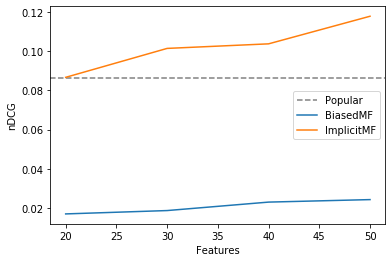

In [17]:
mf_scores = ndcg.groupby(['AlgoClass', 'features'])['ndcg'].mean().reset_index()
pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('AlgoClass'):
    plt.plot(data['features'], data['ndcg'], label=algo)
plt.legend()
plt.xlabel('Features')
plt.ylabel('nDCG')